Author: Antonio Cima

Description: A training model using both MLP and CNN models to compare efficency

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras import layers, models, optimizers, utils, datasets
#from notebooks.utils import display
NUM_CLASSES = 10
(x_train, y_train), (x_test, y_test) = datasets.cifar10.load_data()
x_train = x_train.astype("float32") / 255.0
x_test = x_test.astype("float32") / 255.0

y_train = utils.to_categorical(y_train, NUM_CLASSES)
y_test = utils.to_categorical(y_test, NUM_CLASSES)

170498071/170498071 [==============================] - 2s 0us/step


In [2]:
def create_mlp_model(input_shape):
  model = models.Sequential([
        layers.Flatten(input_shape=input_shape),
        layers.Dropout(0.3),
        layers.Dense(200, activation='relu'),
        layers.Dense(150, activation='relu'),
        layers.Dense(NUM_CLASSES, activation='softmax')
        ])


  opt = optimizers.Adam(learning_rate=0.0005)
  model.compile(
    loss="categorical_crossentropy", optimizer=opt, metrics=["accuracy"] #could not use sparse_categorical_crossentropy or it would crash the entire program
  )
  history = model.fit(x_train, y_train, batch_size=32, epochs=10, shuffle=True, validation_data=(x_test, y_test))

  model.evaluate(x_test, y_test)

  plt.figure(figsize=(12, 4))


  plt.subplot(1, 2, 1)
  plt.plot(history.history['accuracy'], label='Train Accuracy')
  plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
  plt.title('MLP Model Accuracy')
  plt.xlabel('Epoch')
  plt.ylabel('Accuracy')
  plt.legend()


  plt.subplot(1, 2, 2)
  plt.plot(history.history['loss'], label='Train Loss')
  plt.plot(history.history['val_loss'], label='Validation Loss')
  plt.title('MLP Model Loss')
  plt.xlabel('Epoch')
  plt.ylabel('Loss')
  plt.legend()

  plt.show()

  CLASSES = np.array([
        "airplane",
        "automobile",
        "bird",
        "cat",
        "deer",
        "dog",
        "frog",
        "horse",
        "ship",
        "truck",
    ]
  )

  preds = model.predict(x_test)
  preds_single = CLASSES[np.argmax(preds, axis=-1)]
  actual_single = CLASSES[np.argmax(y_test, axis=-1)]
  n_to_show = 10
  indices = np.random.choice(range(len(x_test)), n_to_show)

  fig = plt.figure(figsize=(15, 3))
  fig.subplots_adjust(hspace=0.4, wspace=0.4)

  for i, idx in enumerate(indices):
    img = x_test[idx]
    ax = fig.add_subplot(1, n_to_show, i + 1)
    ax.axis("off")
    ax.text(
        0.5,
        -0.35,
        "pred = " + str(preds_single[idx]),
        fontsize=10,
        ha="center",
        transform=ax.transAxes,
    )
    ax.text(
        0.5,
        -0.7,
        "act = " + str(actual_single[idx]),
        fontsize=10,
        ha="center",
        transform=ax.transAxes,
    )
    ax.imshow(img)
  return model

MLP Discussion:
- The MLP Model was one of the faster models in this homework, however, it's speed came with a drawback to accuracy, and it's loss was way higher than CNN's.
- MLP's biggest downside is that it treats the images it's comparing as just a flatened vector of bits and has a generally harder time of picking out patterns.
- MLP would need to stay clear of droppoffs, MLP is probably as good as it needs to be as is.

In [3]:
def create_cnn_model(input_shape):
   model = models.Sequential([
        layers.Conv2D(32, kernel_size=3, strides=1, padding="same", input_shape=input_shape),
        layers.BatchNormalization(),
        layers.LeakyReLU(),

        layers.Conv2D(32, kernel_size=3, strides=2, padding="same"),
        layers.BatchNormalization(),
        layers.LeakyReLU(),

        layers.Conv2D(64, kernel_size=3, strides=1, padding="same"),
        layers.BatchNormalization(),
        layers.LeakyReLU(),

        layers.Conv2D(64, kernel_size=3, strides=2, padding="same"),
        layers.BatchNormalization(),
        layers.LeakyReLU(),

        layers.Flatten(),

        layers.Dense(128),
        layers.BatchNormalization(),
        layers.LeakyReLU(),
        layers.Dropout(rate=0.5),

        layers.Dense(NUM_CLASSES, activation="softmax")
   ])

   opt = optimizers.Adam(learning_rate=0.0005)
   model.compile(
        loss="categorical_crossentropy", optimizer=opt, metrics=["accuracy"]
   )
   history = model.fit(x_train, y_train, batch_size=32, epochs=10, shuffle=True, validation_data=(x_test, y_test))

   model.evaluate(x_test, y_test)

   plt.figure(figsize=(12, 4))


   plt.subplot(1, 2, 1)
   plt.plot(history.history['accuracy'], label='Train Accuracy')
   plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
   plt.title('CNN Model Accuracy')
   plt.xlabel('Epoch')
   plt.ylabel('Accuracy')
   plt.legend()


   plt.subplot(1, 2, 2)
   plt.plot(history.history['loss'], label='Train Loss')
   plt.plot(history.history['val_loss'], label='Validation Loss')
   plt.title('CNN Model Loss')
   plt.xlabel('Epoch')
   plt.ylabel('Loss')
   plt.legend()

   plt.show()

   CLASSES = np.array(
        [
            "airplane",
            "automobile",
            "bird",
            "cat",
            "deer",
            "dog",
            "frog",
            "horse",
            "ship",
            "truck",
        ]
    )

   preds = model.predict(x_test)
   preds_single = CLASSES[np.argmax(preds, axis=-1)]
   actual_single = CLASSES[np.argmax(y_test, axis=-1)]
   n_to_show = 10
   indices = np.random.choice(range(len(x_test)), n_to_show)

   fig = plt.figure(figsize=(15, 3))
   fig.subplots_adjust(hspace=0.4, wspace=0.4)

   for i, idx in enumerate(indices):
        img = x_test[idx]
        ax = fig.add_subplot(1, n_to_show, i + 1)
        ax.axis("off")
        ax.text(
            0.5,
            -0.35,
            "pred = " + str(preds_single[idx]),
            fontsize=10,
            ha="center",
            transform=ax.transAxes,
        )
        ax.text(
            0.5,
            -0.7,
            "act = " + str(actual_single[idx]),
            fontsize=10,
            ha="center",
            transform=ax.transAxes,
        )
        ax.imshow(img)

   return model

CNN Discussion:
- The CNN Model, while being slower, had higher accuracy and lower loss rates
- CNN is usually better for handling this type of image recognition due to it's layering and it's apt patern recognizing paramaters
- So while it was more accurate, droppingout can be a much needed resource when programs take forever, it can help on time, and also, when we are looking at these images, we are trying to predict with a high chance, we're not going for perfection, which perfection would take forever anyways.

Epoch 1/10
1563/1563 [==============================] - 9s 5ms/step - loss: 1.8784 - accuracy: 0.3222 - val_loss: 1.6844 - val_accuracy: 0.3944
Epoch 2/10
1563/1563 [==============================] - 8s 5ms/step - loss: 1.7086 - accuracy: 0.3858 - val_loss: 1.6856 - val_accuracy: 0.4072
Epoch 3/10
1563/1563 [==============================] - 8s 5ms/step - loss: 1.6444 - accuracy: 0.4117 - val_loss: 1.6353 - val_accuracy: 0.4176
Epoch 4/10
1563/1563 [==============================] - 8s 5ms/step - loss: 1.6004 - accuracy: 0.4263 - val_loss: 1.5449 - val_accuracy: 0.4454
Epoch 5/10
1563/1563 [==============================] - 8s 5ms/step - loss: 1.5674 - accuracy: 0.4401 - val_loss: 1.5151 - val_accuracy: 0.4568
Epoch 6/10
1563/1563 [==============================] - 8s 5ms/step - loss: 1.5432 - accuracy: 0.4472 - val_loss: 1.4891 - val_accuracy: 0.4702
Epoch 7/10
1563/1563 [==============================] - 8s 5ms/step - loss: 1.5172 - accuracy: 0.4579 - val_loss: 1.5121 - val_accuracy:

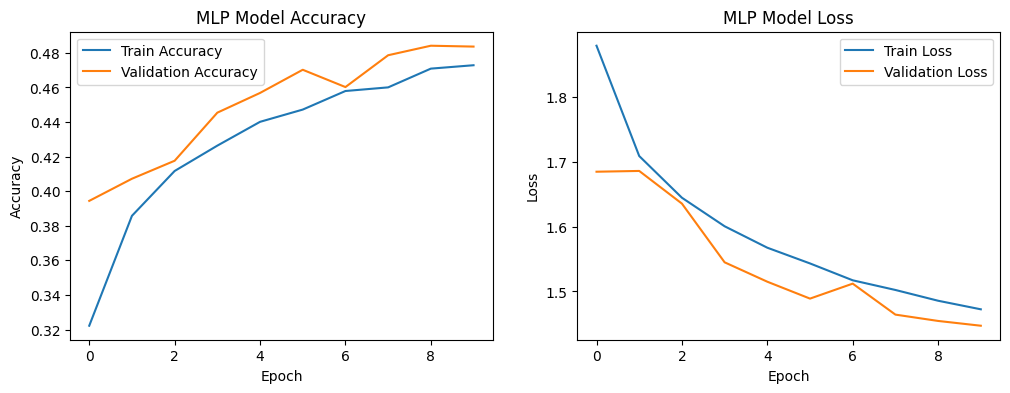

313/313 [==============================] - 1s 2ms/step
Epoch 1/10
1563/1563 [==============================] - 35s 21ms/step - loss: 1.5849 - accuracy: 0.4438 - val_loss: 1.2749 - val_accuracy: 0.5435
Epoch 2/10
1563/1563 [==============================] - 33s 21ms/step - loss: 1.1950 - accuracy: 0.5761 - val_loss: 1.1678 - val_accuracy: 0.5847
Epoch 3/10
1563/1563 [==============================] - 33s 21ms/step - loss: 1.0277 - accuracy: 0.6396 - val_loss: 1.0460 - val_accuracy: 0.6231
Epoch 4/10
1563/1563 [==============================] - 33s 21ms/step - loss: 0.9395 - accuracy: 0.6715 - val_loss: 0.9528 - val_accuracy: 0.6718
Epoch 5/10
1563/1563 [==============================] - 34s 21ms/step - loss: 0.8630 - accuracy: 0.6955 - val_loss: 0.8307 - val_accuracy: 0.7099
Epoch 6/10
1563/1563 [==============================] - 34s 22ms/step - loss: 0.8107 - accuracy: 0.7186 - val_loss: 0.8965 - val_accuracy: 0.6906
Epoch 7/10
1563/1563 [==============================] - 33s 21ms/step

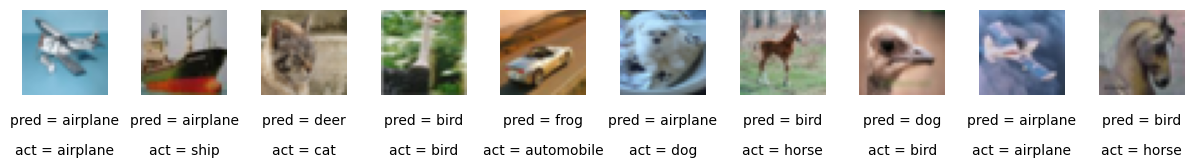

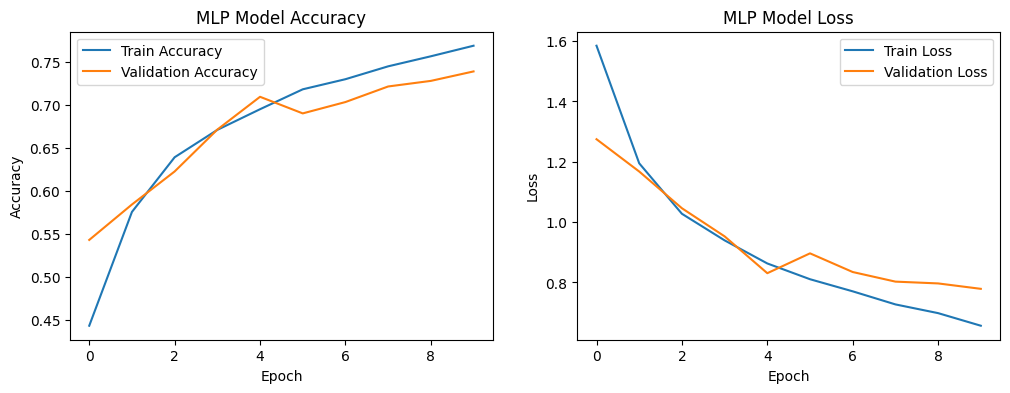

313/313 [==============================] - 2s 6ms/step


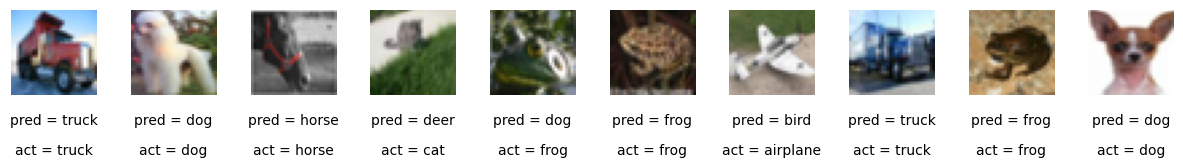

In [4]:
create_mlp_model((32, 32, 3))
create_cnn_model((32, 32, 3))
